<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


#  Sentiment Analysis <a class="anchor" id="PSCRAP"></a>



<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

### Table of Contents <a class="anchor" id="SENT_toc"></a>

* [Table of Contents](#SENT_toc)
    * [1. Description](#SENT_page_1)
    * [2. Import Packages and Notebook Setup](#SENT_page_2)
    * [3. Import Data](#SENT_page_3)
    * [4. Data Wrangling](#SENT_page_4)
    * [5. Data Collection Automation](#SENT_page_5)
    * [6. Data Formatting](#SENT_page_6)
    * [7. Cleaning The Data](#SENT_page_7)
    * [8. Creating a new Cleaned Dataset](#SENT_page_8)
    * [9. Counting Columns](#SENT_page_9)
    * [10. Get Info about the Dataset](#SENT_page_10)
    * [11. Get Descriptive Statistics about the Dataset](#SENT_page_11)
    * [12. Counting Rows and Removing any NANs](#SENT_page_12)
    * [13. Correlation Analysis](#SENT_page_13)
    * [14. Principal Component Analysis (PCA)](#SENT_page_14)
    * [15. Group Comparison](#SENT_page_15)
    * [16. TBD](#SENT_page_16)
    * [17. Groupby Function](#SENT_page_17)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 1 - Description <a class="anchor" id="SENT_page_1"></a>

[Back to Top](#SENT_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

> Add description here 

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 2 - Import Packages and Notebook Setup <a class="anchor" id="SENT_page_2"></a>

[Back to Top](#SENT_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [1]:
# Data import and manipulation
import pandas as pd
import numpy as np # for linear algebra
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [45]:
# Set no max rows and columns to view data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 100)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 3 - Import Data <a class="anchor" id="SENT_page_3"></a>

[Back to Top](#SENT_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

> Reference:
The dataset 'train' was downloaded from Kaggle and originally post by ANKUR SINHA, and can be found
[HERE:](https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news?resource=download)

In [79]:
# Test data is the datat collected in the Web Scrape Notebook

test = pd.read_csv('../Data/ConsolidatedHeadline_CV.csv', encoding='latin-1')

In [56]:
test.to_csv('../Data/UTFdata_CV.csv', encoding='utf-8')

In [57]:
testA = pd.read_csv('../Data/UTFdata_CV.csv', encoding='utf-8')

In [136]:
# Training data from Kaggle

train = pd.read_csv('../Data/SentimentAnalysisTrainData_CV.csv', encoding='latin-1')

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 4 - Data Wrangling <a class="anchor" id="SENT_page_4"></a>

[Back to Top](#SENT_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Training Data 

In [137]:
train.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


#### Add Column Names

In [138]:
train_col = train.rename(columns={train.columns[0]: 'sent_code', train.columns[1]: 'text'})


In [139]:
train_col.head()

,sent_code,text
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


## Sentiment(sent_code) Values

In [140]:
values = train_col.iloc[:, 0].value_counts()
values

sent_code
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64

## Recode the data as:
* Negative = 0
* Neutral = 1
* Positive = 2

In [141]:
trainR = train_col.replace({'sent_code': {'negative': 0, 'neutral': 1, 'positive': 2}})


In [142]:
trainR.head()

,sent_code,text
0,1,Technopolis plans to develop in stages an area...
1,0,The international electronic industry company ...
2,2,With the new production plant the company woul...
3,2,According to the company 's updated strategy f...
4,2,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [159]:
trainR.iloc[:, 0].value_counts()

sent_code
1    2878
2    1363
0     604
Name: count, dtype: int64

### Preview Some Headlines of Training Data By sentiment category

In [160]:
# Look at headlines with target = 0 which indicates a negative headline
trainR[trainR['sent_code'] == 0]['text'].values[0:1]

array(['The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .'],
      dtype=object)

In [161]:
# Look at headlines with target = 1 which indicates a neutral headline
trainR[trainR['sent_code'] == 1]['text'].values[0:1]

array(['Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .'],
      dtype=object)

In [162]:
# Look at headlines with target = 2 which indicates a positive headline
trainR[trainR['sent_code'] == 2]['text'].values[0:1]

array(['With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .'],
      dtype=object)

# Train Data Processing

In [221]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [208]:
!pip install wordcloud

                                              0.0/151.4 kB ? eta -:--:--
     -------                                 30.7/151.4 kB 1.4 MB/s eta 0:00:01
     -----------------------                 92.2/151.4 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 151.4/151.4 kB 1.0 MB/s eta 0:00:00


In [190]:
trainR.head(2)

,sent_code,text
0,1,Technopolis plans to develop in stages an area...
1,0,The international electronic industry company ...


In [224]:
# Create working Dataframe
train_viz = trainR
train_viz.head(2)

,sent_code,text
0,1,Technopolis plans to develop in stages an area...
1,0,The international electronic industry company ...


In [225]:
import re

# Create empty dataframe for processed training data
train_vizP = pd.DataFrame()

# Add text data as lower case
train_vizP['processed_text'] = train_viz['text'].apply(lambda x: x.lower())


In [226]:
# Remove unwanted characters from text data
train_vizP['processed_text'] = train_vizP['processed_text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [227]:

# Add the column with sentiment labels for training
train_vizP['sentiment'] = train_viz['sent_code']

In [228]:
# Preview Clean data
train_vizP.head(3)

,processed_text,sentiment
0,technopolis plans to develop in stages an area...,1
1,the international electronic industry company ...,0
2,with the new production plant the company woul...,2


### Remove stop words


In [229]:
# Set up stop words

stop_words = set(stopwords.words('english'))

In [213]:
# Tokenize text
train_vizP['tokens'] = train_vizP['processed_text'].apply(word_tokenize)

In [216]:
# Word Frequency

word_freq = Counter()
for tokens in train_vizP['tokens']:
    word_freq.update(tokens)

In [217]:
# Get the most common words and their frequencies
top_words = word_freq.most_common(20)
print(top_words)

[('the', 6064), ('of', 3214), ('in', 2969), ('and', 2593), ('to', 2506), ('a', 1732), ('eur', 1310), ('for', 1151), ('s', 1056), ('is', 927), ('will', 850), ('company', 846), ('from', 768), ('on', 680), ('its', 646), ('mn', 593), ('has', 578), ('with', 573), ('by', 558), ('as', 548)]


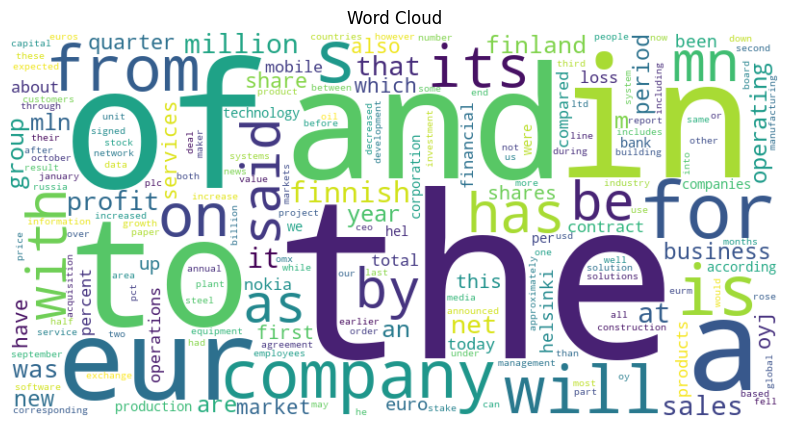

In [219]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

# Test Data

In [105]:
# Create a df to work with from the imported df
test1 = testA

### There is an unnamed column here that needs to be dropped as well as many Null Values

In [106]:
test1.head(2)

,Unnamed: 0,"ï»¿""debt ceiling negotiators make progress on spending","but still have 'major issues'""",morgan stanley upgrades this mining stock that can surge more than 20%,"ai is the latest buzzword in techbut before investing, know these 4 terms","ford's ev charging deal with tesla puts pressure on gm, other rival automakers",marvell shares soar 25% after the chip firm beats on top and bottom line results,"jpmorgan chase cut about 500 jobs this week, including technology and operations roles",dow jumps 300 points as wall street grows hopeful that a debt ceiling deal can be reached,nvidia shares jumped 25% this week and got cheaper. here's how that happens,disney rips desantis bid to disqualify judge in free speech lawsuit,is there a 'right' age for kids to be on social media? here's what an expert says,investors shifted into these gold and small-cap etfs this week,vesting means it can take up to 6 years for workers to own their 401(k) match,a.i. excitement leads to a winning week for nvidia and other tech stocks,"despite all odds, consumers are still traveling this summer. how to play it",taylor swift to metallica: top 10 most in-demand artists of summer,companies are learning gen z isnt the easiest generation to work with,"club name ford teams up with tesla, sending shares soaring",paramount shares pop after bdt capital bets on the media giant's key shareholder,biden interior advances renewable energy transmission projects in nevada,"needham says this stock plays the 'almost perfect marriage' between a.i., crypto","30-year-old billionaire started with a website, sewing kit and pizza hut salary",why the pause on student loan payments has been a win for public servants,house passes bill blocking student debt forgivenesswhat borrowers need to know,jpmorgan ceo jamie dimon faces deposition in jeffrey epstein lawsuits,how virtual layoffs became the new normal for workplaces,bofa hits spacecraft builder terran orbital with rare double downgrade,heres why it might be time to buy longer-term bonds now,"jpmorgan chase cut about 500 jobs this week, including tech and operations roles",how this cmo got comfortable embracing his asian identity at work,facebook-giphy sale shows how fear of regulators is slowing m&a market,apple and nvidia are in my top 5 holdings. am i still diversified enough?,"stocks making the biggest moves midday: ford, marvell technology, gap and more","companies add, expand tuition assistance so workers can go back to college"
0,0,stocks rally friday on hopes for a debt ceilin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,treasury says it could run out of money june 5...,next week hints at only short-lived debt deal ...,"the tech trade is back, driven by a.i. craze a...","the tech trade is back, driven by a.i. craze a...",treasury now says it could run out of money ju...,marvell shares soar 32% after the chip firm be...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# This is dropping the unnamed column and creating a new df test2

test2 = test1.drop(columns=[test1.columns[0]])

In [110]:
# Confirm it dropped properly
test2.head(2)

,"ï»¿""debt ceiling negotiators make progress on spending","but still have 'major issues'""",morgan stanley upgrades this mining stock that can surge more than 20%,"ai is the latest buzzword in techbut before investing, know these 4 terms","ford's ev charging deal with tesla puts pressure on gm, other rival automakers",marvell shares soar 25% after the chip firm beats on top and bottom line results,"jpmorgan chase cut about 500 jobs this week, including technology and operations roles",dow jumps 300 points as wall street grows hopeful that a debt ceiling deal can be reached,nvidia shares jumped 25% this week and got cheaper. here's how that happens,disney rips desantis bid to disqualify judge in free speech lawsuit,is there a 'right' age for kids to be on social media? here's what an expert says,investors shifted into these gold and small-cap etfs this week,vesting means it can take up to 6 years for workers to own their 401(k) match,a.i. excitement leads to a winning week for nvidia and other tech stocks,"despite all odds, consumers are still traveling this summer. how to play it",taylor swift to metallica: top 10 most in-demand artists of summer,companies are learning gen z isnt the easiest generation to work with,"club name ford teams up with tesla, sending shares soaring",paramount shares pop after bdt capital bets on the media giant's key shareholder,biden interior advances renewable energy transmission projects in nevada,"needham says this stock plays the 'almost perfect marriage' between a.i., crypto","30-year-old billionaire started with a website, sewing kit and pizza hut salary",why the pause on student loan payments has been a win for public servants,house passes bill blocking student debt forgivenesswhat borrowers need to know,jpmorgan ceo jamie dimon faces deposition in jeffrey epstein lawsuits,how virtual layoffs became the new normal for workplaces,bofa hits spacecraft builder terran orbital with rare double downgrade,heres why it might be time to buy longer-term bonds now,"jpmorgan chase cut about 500 jobs this week, including tech and operations roles",how this cmo got comfortable embracing his asian identity at work,facebook-giphy sale shows how fear of regulators is slowing m&a market,apple and nvidia are in my top 5 holdings. am i still diversified enough?,"stocks making the biggest moves midday: ford, marvell technology, gap and more","companies add, expand tuition assistance so workers can go back to college"
0,stocks rally friday on hopes for a debt ceilin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,treasury says it could run out of money june 5...,next week hints at only short-lived debt deal ...,"the tech trade is back, driven by a.i. craze a...","the tech trade is back, driven by a.i. craze a...",treasury now says it could run out of money ju...,marvell shares soar 32% after the chip firm be...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Here I am replacing the NaN wit the word neutral1. Serveral iterations proved filter

In [18]:
# Filter?

# filtered_data = [x for x in test2 if x is not None]
# filtered_data1 = test1.apply(lambda x:pd.Series(x.dropna().values))

In [21]:
# filtered_data1.head()

,Unnamed: 0,ï»¿,"debt ceiling negotiators make progress on spending, but still have 'major issues'",morgan stanley upgrades this mining stock that can surge more than 20%,"ai is the latest buzzword in techbut before investing, know these 4 terms","ford's ev charging deal with tesla puts pressure on gm, other rival automakers",marvell shares soar 25% after the chip firm beats on top and bottom line results,"jpmorgan chase cut about 500 jobs this week, including technology and operations roles",dow jumps 300 points as wall street grows hopeful that a debt ceiling deal can be reached,nvidia shares jumped 25% this week and got cheaper. here's how that happens,disney rips desantis bid to disqualify judge in free speech lawsuit,is there a 'right' age for kids to be on social media? here's what an expert says,investors shifted into these gold and small-cap etfs this week,vesting means it can take up to 6 years for workers to own their 401(k) match,a.i. excitement leads to a winning week for nvidia and other tech stocks,"despite all odds, consumers are still traveling this summer. how to play it",taylor swift to metallica: top 10 most in-demand artists of summer,companies are learning gen z isnt the easiest generation to work with,"club name ford teams up with tesla, sending shares soaring",paramount shares pop after bdt capital bets on the media giant's key shareholder,biden interior advances renewable energy transmission projects in nevada,"needham says this stock plays the 'almost perfect marriage' between a.i., crypto","30-year-old billionaire started with a website, sewing kit and pizza hut salary",why the pause on student loan payments has been a win for public servants,house passes bill blocking student debt forgivenesswhat borrowers need to know,jpmorgan ceo jamie dimon faces deposition in jeffrey epstein lawsuits,how virtual layoffs became the new normal for workplaces,bofa hits spacecraft builder terran orbital with rare double downgrade,heres why it might be time to buy longer-term bonds now,"jpmorgan chase cut about 500 jobs this week, including tech and operations roles",how this cmo got comfortable embracing his asian identity at work,facebook-giphy sale shows how fear of regulators is slowing m&a market,apple and nvidia are in my top 5 holdings. am i still diversified enough?,"stocks making the biggest moves midday: ford, marvell technology, gap and more","companies add, expand tuition assistance so workers can go back to college"
0,0,stocks rally friday on hopes for a debt ceilin...,next week hints at only short-lived debt deal ...,"the tech trade is back, driven by a.i. craze a...","the tech trade is back, driven by a.i. craze a...",treasury now says it could run out of money ju...,marvell shares soar 32% after the chip firm be...,why commercial real estate firms are joining t...,how mastercard has outperformed visa,biden says he's 'very optimistic' about a debt...,mark cuban calls elon musks twitter algorithm ...,steve adcock: the 3 'stupidest' myths i've hea...,marvell technology shares surge after earnings...,microsoft keyboard users are devastated after ...,japan stocks are on fire this year. why the ra...,chart analysts see market correction coming af...,"jefferies upgrades ford motor, says auto giant...","tuesday's biggest analyst calls: nvidia, tesla...",we are trimming a couple of our tech stocks th...,"chatgpt cited ""bogus"" cases for a new york fed...",theranos founder elizabeth holmes set to repor...,cathie wood's ark invest misses out on nvidia'...,35-year-old who makes over $5k/month in passiv...,bofa says this 'best-in-class' electric vehicl...,tylenol parent kenvue can capitalize on consum...,drone attack hits moscow buildings; kyiv endur...,5 things to know before the stock market opens...,atlantic equities says coinbase is the 'best e...,bitcoin rises as investors await vote on tenta...,stablecoin giant tether to mine bitcoin in uru...,jim cramer's top 10 things to watch in the sto...,norway's oil fu

In [24]:
# # Replace NaN with the word neutral

# # Assuming your DataFrame is named 'df'
# filtered_data2 = test1.fillna('neutral1')

# # Print the updated DataFra
# filtered_data2.tail()

,Unnamed: 0,ï»¿,"debt ceiling negotiators make progress on spending, but still have 'major issues'",morgan stanley upgrades this mining stock that can surge more than 20%,"ai is the latest buzzword in techbut before investing, know these 4 terms","ford's ev charging deal with tesla puts pressure on gm, other rival automakers",marvell shares soar 25% after the chip firm beats on top and bottom line results,"jpmorgan chase cut about 500 jobs this week, including technology and operations roles",dow jumps 300 points as wall street grows hopeful that a debt ceiling deal can be reached,nvidia shares jumped 25% this week and got cheaper. here's how that happens,disney rips desantis bid to disqualify judge in free speech lawsuit,is there a 'right' age for kids to be on social media? here's what an expert says,investors shifted into these gold and small-cap etfs this week,vesting means it can take up to 6 years for workers to own their 401(k) match,a.i. excitement leads to a winning week for nvidia and other tech stocks,"despite all odds, consumers are still traveling this summer. how to play it",taylor swift to metallica: top 10 most in-demand artists of summer,companies are learning gen z isnt the easiest generation to work with,"club name ford teams up with tesla, sending shares soaring",paramount shares pop after bdt capital bets on the media giant's key shareholder,biden interior advances renewable energy transmission projects in nevada,"needham says this stock plays the 'almost perfect marriage' between a.i., crypto","30-year-old billionaire started with a website, sewing kit and pizza hut salary",why the pause on student loan payments has been a win for public servants,house passes bill blocking student debt forgivenesswhat borrowers need to know,jpmorgan ceo jamie dimon faces deposition in jeffrey epstein lawsuits,how virtual layoffs became the new normal for workplaces,bofa hits spacecraft builder terran orbital with rare double downgrade,heres why it might be time to buy longer-term bonds now,"jpmorgan chase cut about 500 jobs this week, including tech and operations roles",how this cmo got comfortable embracing his asian identity at work,facebook-giphy sale shows how fear of regulators is slowing m&a market,apple and nvidia are in my top 5 holdings. am i still diversified enough?,"stocks making the biggest moves midday: ford, marvell technology, gap and more","companies add, expand tuition assistance so workers can go back to college"
28,28,these are the 7 most hated brands in americael...,this cloud stock is an a.i. winner despite nea...,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1
29,29,i left the u.s. for paris6 things french peopl...,are you the 'dwight' of your office? 3 signs y...,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1
30,30,student loan payments will resume soon. thats ...,apple announces first major product since 2014...,democrats warn musk after twitter safety execs...,"morgan stanley says dont buy this breakout, a ...","bitcoin drops below $26,000 after sec sues cry...",apple announces its first major product since ...,"jamie dimon, americas top banker, has 'no plan...",universal basic income could be coming to the ...,"bill gates' top books, tv shows and music for ...","evercore isi raises market outlook, gives 'mom...",a history of stocks with high price-to-sales r...,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,neutral1,ne

# It appears the above and other vairations of .dropna() will drop the entire row or column if it includes a NaN

In [111]:
# Create an empty list to store the values
new_values = []


for column in test2.columns:
    # Iterate through each value in the 'Value' column
    for value in test2[column]:
        # Check if the value is not equal to 'neutral1'
        if value != 'NaN':
            # Append the value to the list
            new_values.append(value)

# Create a DataFrame from the new values
new_df = pd.DataFrame({'NewValue': new_values})

# Append the DataFrame to the 'data.csv' file
new_df.to_csv('Test_Data_Sentiment_CV.csv', mode='a', index=False, header=False)

In [112]:
df_test = pd.read_csv('Test_Data_Sentiment_CV.csv')

In [113]:
df_test

,"stocks rally friday on hopes for a debt ceiling deal, nasdaq notches fifth straight week of wins"
0,treasury says it could run out of money june 5...
1,top 10 cheapest places in the u.s. to buy a be...
2,with emergency savings down and credit card ba...
3,bernstein gives an under-the-radar way to play...
4,schwarzenegger: 'no one gives a s--- about' cl...
5,"nvidia's ascent continues, while citi says buy..."
6,nvidia crosses into $1 trillion market cap bef...
7,what damar hamlin thinks about fear and his de...
8,top 5 trending summer travel destinations 2023...
9,stocks making the biggest moves after hours: a...


In [114]:
dftest_dropNA = df_test.dropna()

In [126]:
dftest_dropNA.head()

,"stocks rally friday on hopes for a debt ceiling deal, nasdaq notches fifth straight week of wins"
0,treasury says it could run out of money june 5...
1,top 10 cheapest places in the u.s. to buy a be...
2,with emergency savings down and credit card ba...
3,bernstein gives an under-the-radar way to play...
4,schwarzenegger: 'no one gives a s--- about' cl...


# This is the format we have been looking for!!
dftest_dropNA

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 5 - EDA <a class="anchor" id="SENT_page_5"></a>

[Back to Top](#SENT_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [116]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [118]:
# Create working datafram for visulization
train_viz = trainR['text']

In [120]:
train_viz.head()

0    Technopolis plans to develop in stages an area...
1    The international electronic industry company ...
2    With the new production plant the company woul...
3    According to the company 's updated strategy f...
4    FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
Name: text, dtype: object

### Create a Soup and visualizer the data

In [123]:

# Assuming you have the textual data stored in the pandas Series 'text_data'

# Create an empty list to store the extracted text
extracted_text = []

# Iterate through each value in the Series
for value in train_viz:
    # Create a BeautifulSoup object for each value
    soup = BeautifulSoup(value, 'html.parser')
    
    # Extract the desired textual data from the soup object
    cleaned_text = soup.get_text()
    
    # Append the cleaned text to the list
    extracted_text.append(cleaned_text)

C:\Python3\Lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


C:\Python3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 136 (\x88) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 139 (\x8b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 151 (\x97) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


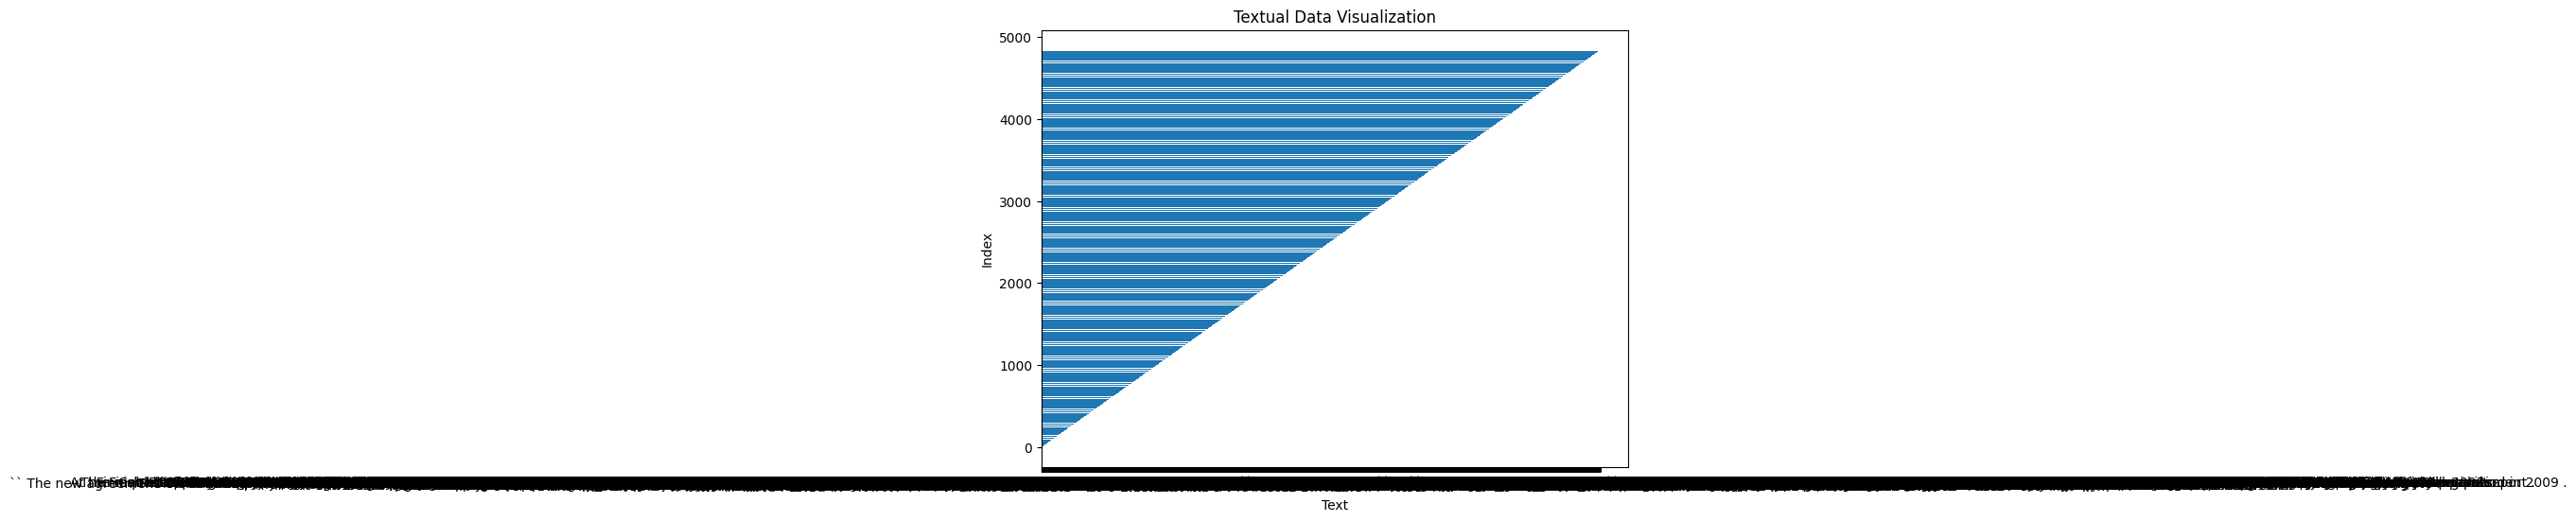

In [124]:
# Visualize the extracted text
plt.figure(figsize=(8, 6))
plt.barh(range(len(extracted_text)), extracted_text)
plt.xlabel('Text')
plt.ylabel('Index')
plt.title('Textual Data Visualization')
plt.show()

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 6 - Training the Model <a class="anchor" id="SENT_page_6"></a>

[Back to Top](#SENT_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">